# Bank customer churn EDA

## Install and import required libraries

In [1]:
!pip install matplotlib
!pip install pandas
!pip install seaborn
# setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'svg'

You should consider upgrading via the '/home/lordaris/Documentos/Python Learning/Data_Science_Portfolio/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/lordaris/Documentos/Python Learning/Data_Science_Portfolio/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/lordaris/Documentos/Python Learning/Data_Science_Portfolio/bin/python -m pip install --upgrade pip' command.


In [2]:
df = pd.read_csv("data/Bank_Customer_Churn_Prediction.csv")

## Data Exploration
### Feature description

In [3]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [4]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

| **Feature name** | **Feature description**                                          |
|------------------|------------------------------------------------------------------|
| customer_id      | self descriptive                                                 |
| credit_score     | creditworthiness                                                 |
| country          | self descriptive                                                 |
| gender           | self descriptive                                                 |
| age              | self descriptive                                                 |
| tenure           | The length of time an account has been a customer or active user |
| balance          | amount of money present in the bank                              |
| products_number  | number of products from the bank                                 |
| credit_card      | shows if the customer owns a credit card                         |
| active_member    | shows if the customer is an active member of the bank            |
| estimated_salary | estimated income of the customer                                 |
| churn            | True indicates that the bank eventually lost the customer        |




In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [6]:
df.nunique()


customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

some insights:
- customer_id have unique values in each row,
- gender, credit_card, active_member and churn are binary data values


In [7]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
df.drop("customer_id", axis=1, inplace=True)

## Exploratory Data Analysis

### Whole dataset visualization

array([[<AxesSubplot: title={'center': 'credit_score'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'tenure'}>],
       [<AxesSubplot: title={'center': 'balance'}>,
        <AxesSubplot: title={'center': 'products_number'}>,
        <AxesSubplot: title={'center': 'credit_card'}>],
       [<AxesSubplot: title={'center': 'active_member'}>,
        <AxesSubplot: title={'center': 'estimated_salary'}>,
        <AxesSubplot: title={'center': 'churn'}>]], dtype=object)

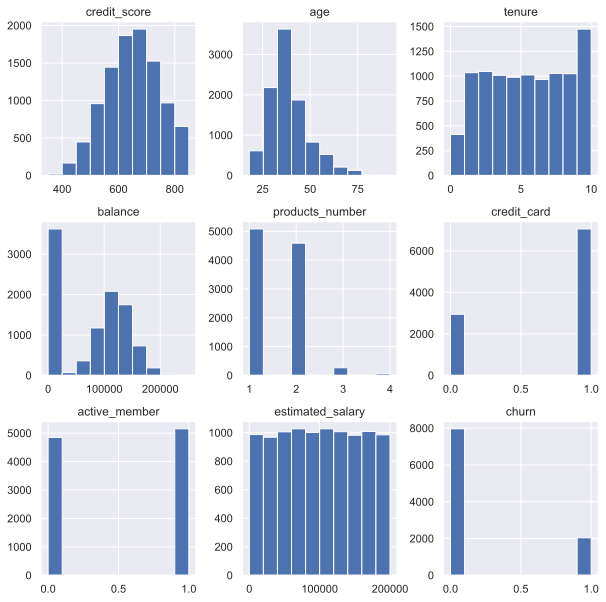

In [9]:
plt.rcParams['figure.figsize'] = (10,10)
df.hist()

In [10]:
features = df.keys()
features = features.drop(["churn", "credit_card", "active_member"])
subsets = ["credit_score"]
df.groupby("churn")[features].mean()

,credit_score,age,tenure,balance,products_number,estimated_salary
churn,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,101465.677531


In [11]:
# Correlation with churn
df.corrwith(df["churn"])

credit_score       -0.027094
age                 0.285323
tenure             -0.014001
balance             0.118533
products_number    -0.047820
credit_card        -0.007138
active_member      -0.156128
estimated_salary    0.012097
churn               1.000000
dtype: float64

In [26]:
features = df.keys()
features = features.drop(["churn", "credit_card", "active_member"])
df.groupby("churn")[features].mean()

,credit_score,age,tenure,balance,products_number,estimated_salary
churn,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,101465.677531


In [14]:
# Correlation with churn
df.corrwith(df["churn"])

credit_score       -0.027094
age                 0.285323
tenure             -0.014001
balance             0.118533
products_number    -0.047820
credit_card        -0.007138
active_member      -0.156128
estimated_salary    0.012097
churn               1.000000
dtype: float64

<AxesSubplot: xlabel='churn', ylabel='count'>

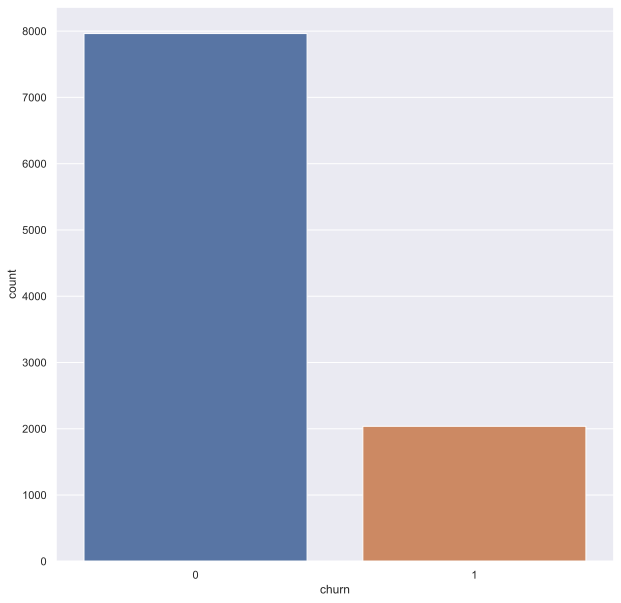

In [15]:
figsize=(12, 4)
sns.countplot(x="churn", data=df)

<AxesSubplot: >

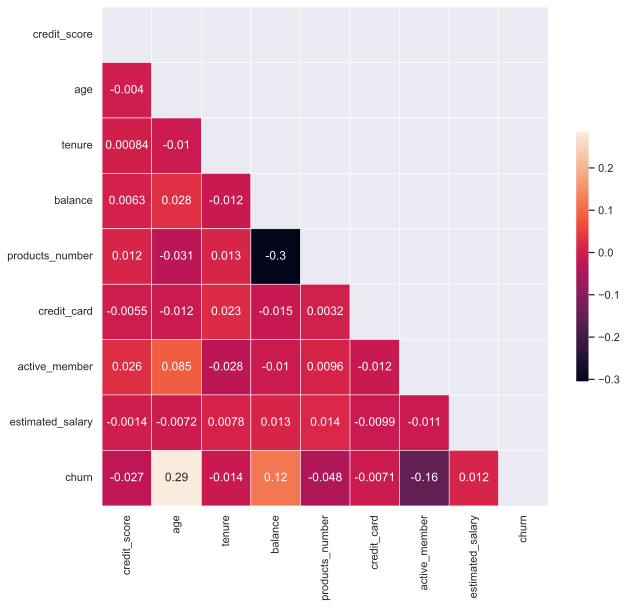

In [16]:
# Diagonal correlation matrix

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10,9))
sns.heatmap(corr, mask=mask,  linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


## Relationship between churn and age

<AxesSubplot: xlabel='age', ylabel='churn'>

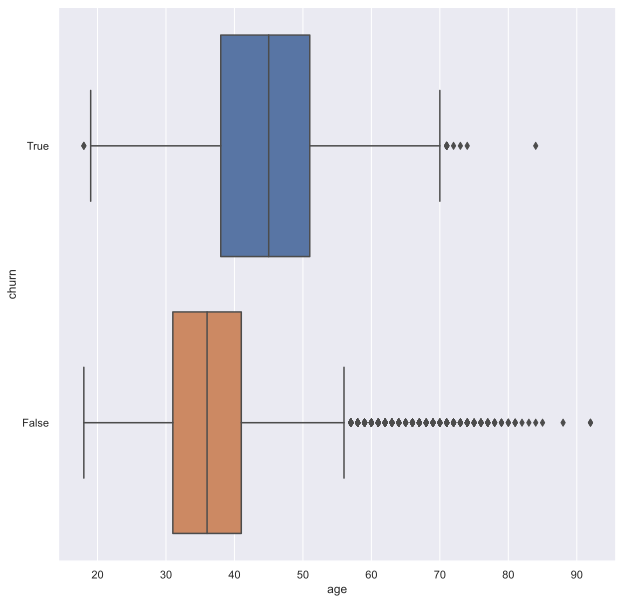

In [17]:
churn = df["churn"].replace({0: "False", 1: "True"}, inplace=False)
sns.boxplot(data = df, x="age", y=churn)

<AxesSubplot: xlabel='balance', ylabel='churn'>

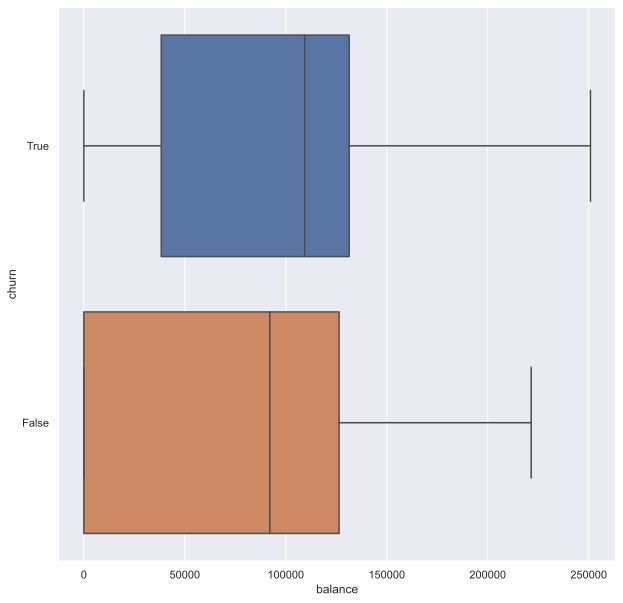

In [28]:
## Relationship between churn and balance
sns.boxplot(data = df, x="balance", y=churn)

## Relationship between churn and binary features:
The binary features are gender, credit_card and active_member


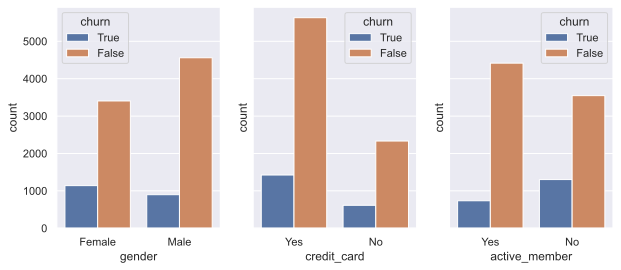

In [18]:
credit_card = df["credit_card"].replace({0: "No", 1: "Yes"}, inplace=False)
active_member = df["active_member"].replace({0: "No", 1: "Yes"}, inplace=False)

_, axes = plt.subplots(1, 3, sharey=True, figsize=(10, 4))
sns.countplot(data=df, x="gender", hue=churn, ax=axes[0])
sns.countplot(data=df, x=credit_card, hue=churn, ax=axes[1])
sns.countplot(data=df, x=active_member, hue=churn, ax=axes[2]);



## relationship between churn and country

<AxesSubplot: xlabel='country', ylabel='count'>

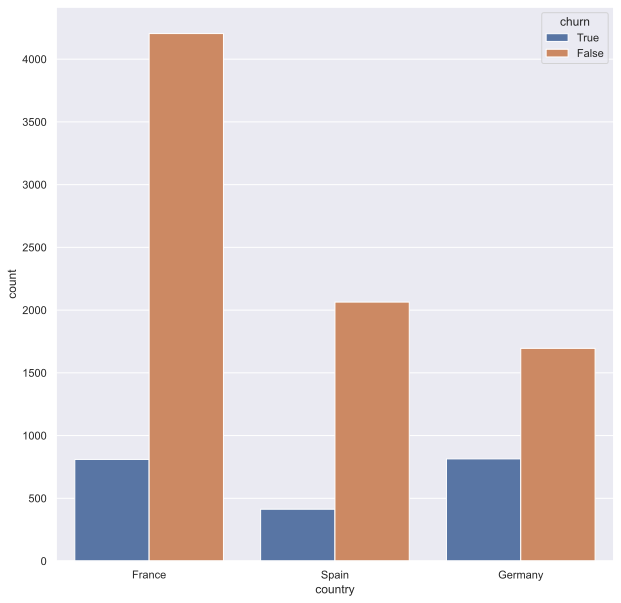

In [19]:
sns.countplot(data=df, x="country", hue=churn)


In [21]:
numerical = df[[
            "credit_score",
            "age",
            "tenure",
            "balance",
            "products_number",
            "estimated_salary"]]


In [22]:
!pip install sklearn
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


You should consider upgrading via the '/home/lordaris/Documentos/Python Learning/Data_Science_Portfolio/bin/python -m pip install --upgrade pip' command.


/home/lordaris/Documentos/Python Learning/Data_Science_Portfolio/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lordaris/Documentos/Python Learning/Data_Science_Portfolio/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


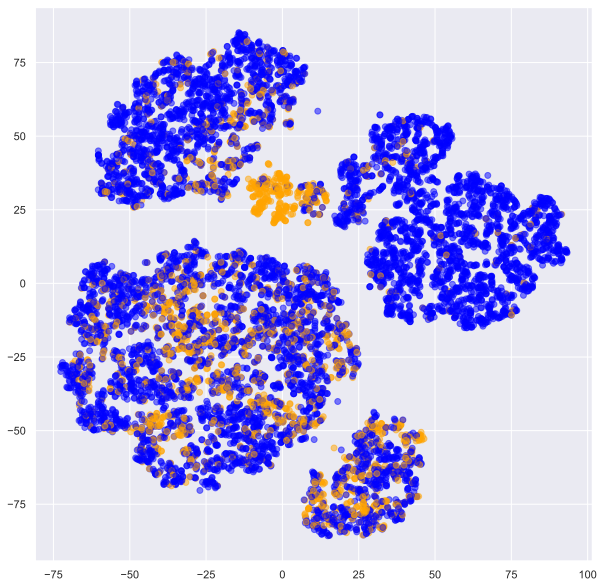

In [23]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(numerical)
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(x_scaled)
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df["churn"].map({0: "blue", 1: "orange"}),
alpha=0.5);

